# 示例：数据读取及预处理
该示例包括以下数据集
1. C-MAPSS
2. XJTU-SY
3. PHM2012

In [1]:
from rulframework.data.FeatureExtractor import FeatureExtractor
from rulframework.data.loader.bearing.XJTULoader import XJTULoader
from rulframework.data.processor.RMSProcessor import RMSProcessor
from rulframework.data.stage.BearingStageCalculator import BearingStageCalculator
from rulframework.data.stage.eol.NinetyThreePercentRMSEoLCalculator import NinetyThreePercentRMSEoLCalculator
from rulframework.data.stage.fpt.ThreeSigmaFPTCalculator import ThreeSigmaFPTCalculator
from rulframework.util.Plotter import Plotter

### 绘图设置

In [2]:
Plotter.DPI = 80

## 1. C-MAPSS 涡扇发动机数据集

In [3]:
from rulframework.data.loader.turbofan.CMAPSSLoader import CMAPSSLoader
from rulframework.util.Plotter import Plotter

### 读取原始数据

DEBUG - 17:43:03 >> 
<< Root directory of dataset: D:\data\dataset\CMAPSSData
	FD001_RUL, location: D:\data\dataset\CMAPSSData\RUL_FD001.txt
	FD002_RUL, location: D:\data\dataset\CMAPSSData\RUL_FD002.txt
	FD003_RUL, location: D:\data\dataset\CMAPSSData\RUL_FD003.txt
	FD004_RUL, location: D:\data\dataset\CMAPSSData\RUL_FD004.txt
	FD001_test, location: D:\data\dataset\CMAPSSData\test_FD001.txt
	FD002_test, location: D:\data\dataset\CMAPSSData\test_FD002.txt
	FD003_test, location: D:\data\dataset\CMAPSSData\test_FD003.txt
	FD004_test, location: D:\data\dataset\CMAPSSData\test_FD004.txt
	FD001_train, location: D:\data\dataset\CMAPSSData\train_FD001.txt
	FD002_train, location: D:\data\dataset\CMAPSSData\train_FD002.txt
	FD003_train, location: D:\data\dataset\CMAPSSData\train_FD003.txt
	FD004_train, location: D:\data\dataset\CMAPSSData\train_FD004.txt
INFO - 17:43:03 >> Loading data entity: FD001_train_1
INFO - 17:43:03 >> Successfully loaded data entity: FD001_train_1


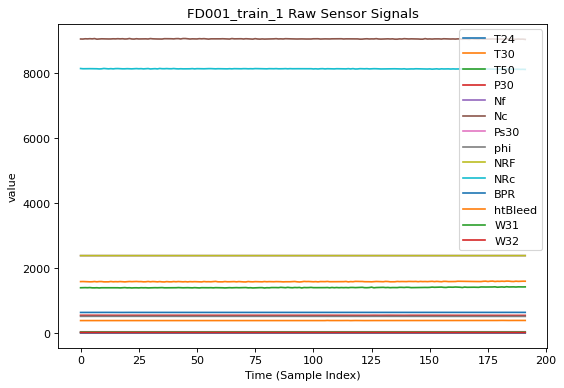

'FD001_train_1 Raw Sensor Signals'

In [4]:
data_loader = CMAPSSLoader('D:\\data\\dataset\\CMAPSSData')
data_loader.normalization_mode = '[0,1]'  # 归一化模式，可选项：'[0,1]'（默认）,'[-1,1]'、'None'
columns_to_drop = [0, 1, 2, 3, 4, 8, 9, 13, 19, 21, 22]
turbofan = data_loader('FD001_train_1', columns_to_drop)
Plotter.raw(turbofan)

### 输出归一化数据图像

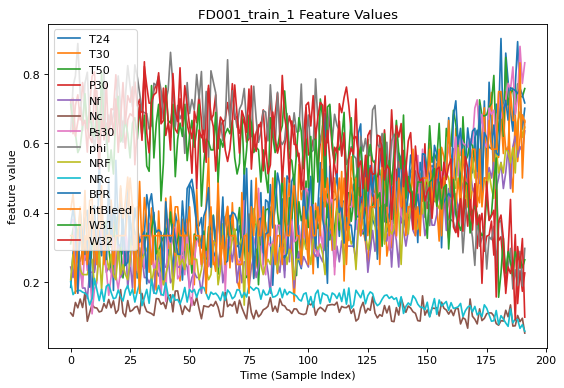

'FD001_train_1 Feature Values'

In [5]:
Plotter.feature(turbofan)

## 2. XJTU-SY 轴承数据集

In [6]:
from rulframework.data.loader.bearing.XJTULoader import XJTULoader
from rulframework.data.FeatureExtractor import FeatureExtractor
from rulframework.data.processor.RMSProcessor import RMSProcessor
from rulframework.data.stage.fpt.ThreeSigmaFPTCalculator import ThreeSigmaFPTCalculator
from rulframework.data.stage.BearingStageCalculator import BearingStageCalculator
from rulframework.util.Plotter import Plotter

### 读取原始数据

DEBUG - 17:43:03 >> 
<< Root directory of dataset: D:\data\dataset\XJTU-SY_Bearing_Datasets
	Bearing1_1, location: D:\data\dataset\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_1
	Bearing1_2, location: D:\data\dataset\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_2
	Bearing1_3, location: D:\data\dataset\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_3
	Bearing1_4, location: D:\data\dataset\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_4
	Bearing1_5, location: D:\data\dataset\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_5
	Bearing2_1, location: D:\data\dataset\XJTU-SY_Bearing_Datasets\37.5Hz11kN\Bearing2_1
	Bearing2_2, location: D:\data\dataset\XJTU-SY_Bearing_Datasets\37.5Hz11kN\Bearing2_2
	Bearing2_3, location: D:\data\dataset\XJTU-SY_Bearing_Datasets\37.5Hz11kN\Bearing2_3
	Bearing2_4, location: D:\data\dataset\XJTU-SY_Bearing_Datasets\37.5Hz11kN\Bearing2_4
	Bearing2_5, location: D:\data\dataset\XJTU-SY_Bearing_Datasets\37.5Hz11kN\Bearing2_5
	Bearing3_1, location: D:\data\dataset\XJTU-SY_Bearing_Dat

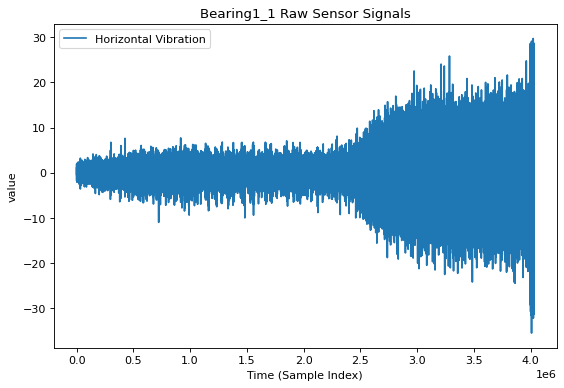

'Bearing1_1 Raw Sensor Signals'

In [7]:
data_loader = XJTULoader('D:\\data\\dataset\\XJTU-SY_Bearing_Datasets')
bearing = data_loader('Bearing1_1', columns='Horizontal Vibration')
Plotter.raw(bearing)

### 计算RMS特征并输出图像

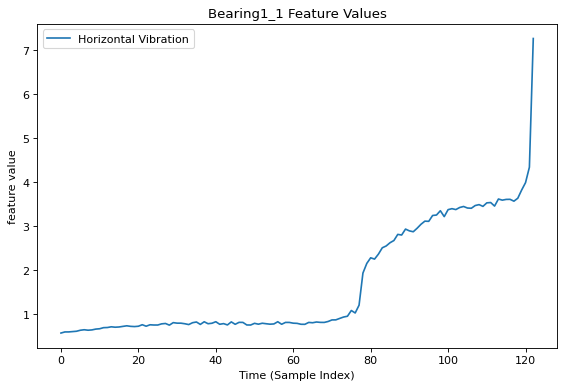

'Bearing1_1 Feature Values'

In [8]:
feature_extractor = FeatureExtractor(RMSProcessor(data_loader.continuum))
feature_extractor(bearing)
Plotter.feature(bearing)

### 划分轴承运行阶段并输出图像

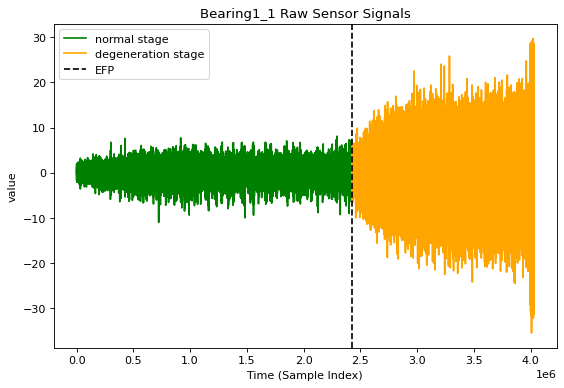

'Bearing1_1 Raw Sensor Signals'

In [9]:
fpt_calculator = ThreeSigmaFPTCalculator(ratio=3)
stage_calculator = BearingStageCalculator(data_loader.continuum, fpt_calculator)
stage_calculator(bearing)
Plotter.raw(bearing, is_staged=True)

### 轴承RMS上的运行阶段划分图像

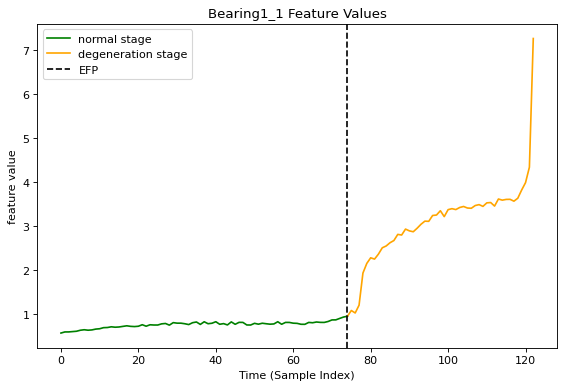

'Bearing1_1 Feature Values'

In [10]:
Plotter.feature(bearing, is_staged=True)

## 3. PHM2012 轴承数据集
与XJTU-SY的处理代码一致，仅须将XJTULoader替换为PHM2012Loader

In [11]:
from rulframework.data.loader.bearing.PHM2012Loader import PHM2012Loader
from rulframework.data.FeatureExtractor import FeatureExtractor
from rulframework.data.processor.RMSProcessor import RMSProcessor
from rulframework.data.stage.fpt.ThreeSigmaFPTCalculator import ThreeSigmaFPTCalculator
from rulframework.data.stage.BearingStageCalculator import BearingStageCalculator
from rulframework.util.Plotter import Plotter

### 读取原始数据

DEBUG - 17:43:10 >> 
<< Root directory of dataset: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master
	Bearing1_1, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing1_1
	Bearing1_2, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing1_2
	Bearing2_1, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing2_1
	Bearing2_2, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing2_2
	Bearing3_1, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing3_1
	Bearing3_2, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing3_2
	Bearing1_3, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Full_Test_Set\Bearing1_3
	Bearing1_4, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Full_Test_Set\Bearing1_4
	Bearing1_5, location: D:\data\

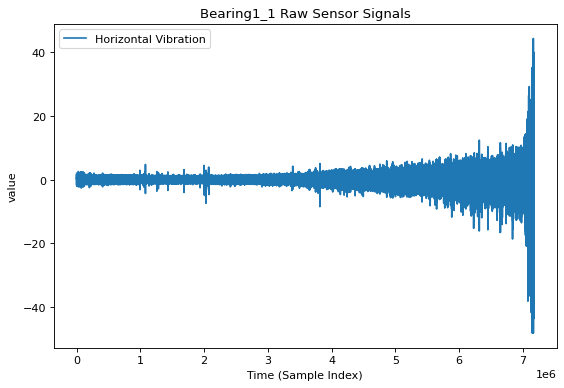

'Bearing1_1 Raw Sensor Signals'

In [12]:
data_loader = PHM2012Loader('D:\\data\\dataset\\phm-ieee-2012-data-challenge-dataset-master')
bearing = data_loader('Bearing1_1', columns='Horizontal Vibration')
Plotter.raw(bearing)

### 计算RMS特征并输出图像

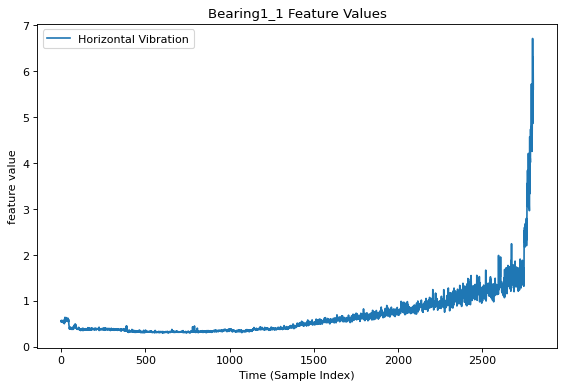

'Bearing1_1 Feature Values'

In [13]:
feature_extractor = FeatureExtractor(RMSProcessor(data_loader.continuum))
feature_extractor(bearing)
Plotter.feature(bearing)

### 划分轴承运行阶段并输出图像

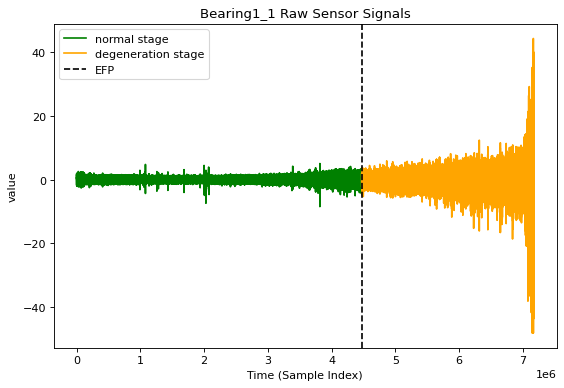

'Bearing1_1 Raw Sensor Signals'

In [14]:
fpt_calculator = ThreeSigmaFPTCalculator(ratio=3)
stage_calculator = BearingStageCalculator(data_loader.continuum, fpt_calculator)
stage_calculator(bearing)
Plotter.raw(bearing, is_staged=True)

### 轴承RMS上的运行阶段划分图像

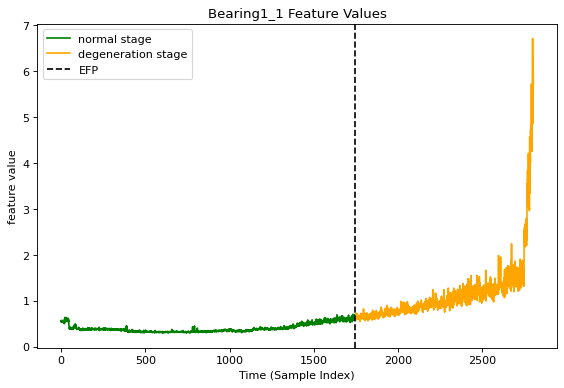

'Bearing1_1 Feature Values'

In [15]:
Plotter.feature(bearing, is_staged=True)